In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
get_ipython().magic('matplotlib inline')
%config InlineBackend.figure_format = 'retina' # retina display

import os
from cl2pd import plotFunctions # cl2pd is deprecated but I'm lazy to copy paste juste a simple plotting function
import h5py

In [2]:
data_path = "/eos/project-d/da-and-diffusion-studies/Wire_Compensator_Studies/DATA_MD/"

In [3]:
os.listdir(data_path)

['DBLM_DATA.hdf5',
 'FILL7385_ADJUST.pkl',
 'FILL7385_INJ.pkl',
 'FILL7386_ADJUST.pkl',
 'README.txt',
 'summary_plot_data.pkl']

In [4]:
summ_plot_df = pd.read_pickle(data_path+'summary_plot_data.pkl')

In [5]:
summ_plot_df.columns

Index(['LHC.BCTDC.A6R4.B1:BEAM_INTENSITY', 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY',
       'LHC.BLM.LIFETIME:B1_BEAM_LIFETIME',
       'LHC.BLM.LIFETIME:B1_CALIBRATED_LOSS', 'LHC.BLM.LIFETIME:B1_LOSS_KW',
       'LHC.BLM.LIFETIME:B2_BEAM_LIFETIME',
       'LHC.BLM.LIFETIME:B2_CALIBRATED_LOSS', 'LHC.BLM.LIFETIME:B2_LOSS_KW',
       'LHC.BLM.LIFETIME:LUMINOSITY_LOSS', 'LHC.RUNCONFIG:IP1-XING-V-MURAD',
       'LHC.RUNCONFIG:IP2-XING-V-MURAD', 'LHC.RUNCONFIG:IP5-XING-H-MURAD',
       'LHC.RUNCONFIG:IP8-XING-H-MURAD', 'RPMBB.RR17.ROF.A12B1:I_MEAS',
       'RPMBB.RR17.ROF.A12B2:I_MEAS', 'RPMC.UL14.RBBCW.L1B2:I_MEAS',
       'RPMC.UL16.RBBCW.R1B2:I_MEAS', 'RPMC.UL557.RBBCW.R5B2:I_MEAS',
       'RPMC.USC55.RBBCW.L5B2:I_MEAS'],
      dtype='object')

In [6]:
# Crossing angle

T0 = summ_plot_df.index[0].to_pydatetime()
T1 = pd.Timestamp('2018-10-29 11:43:29.887000084+00:00', tz='CET').to_pydatetime()
T2 = pd.Timestamp('2018-10-29 12:04:57.258000135+00:00', tz='CET').to_pydatetime()
T3 = pd.Timestamp('2018-10-29 12:23:33.439000130+00:00', tz='CET').to_pydatetime()
T3bis = pd.Timestamp('2018-10-29 13:00:33.439000130+00:00', tz='CET').to_pydatetime()
T4 = summ_plot_df.index[-1].to_pydatetime()

/home/camontan/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: UserWarning: Discarding nonzero nanoseconds in conversion
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
import pickle
with open("Just_The_Data.pkl", 'wb') as f:
    pickle.dump((summ_plot_df['LHC.BLM.LIFETIME:B1_LOSS_KW'], summ_plot_df['LHC.BLM.LIFETIME:B2_LOSS_KW']), f)

with open("Just_The_Data_2.pkl", 'wb') as f:
    pickle.dump((summ_plot_df['LHC.BLM.LIFETIME:B1_CALIBRATED_LOSS'], summ_plot_df['LHC.BLM.LIFETIME:B2_CALIBRATED_LOSS']), f)

with open("protons.pkl", 'wb') as f:
    pickle.dump((summ_plot_df['LHC.BCTDC.A6R4.B1:BEAM_INTENSITY'], summ_plot_df['LHC.BCTDC.A6R4.B2:BEAM_INTENSITY']), f)


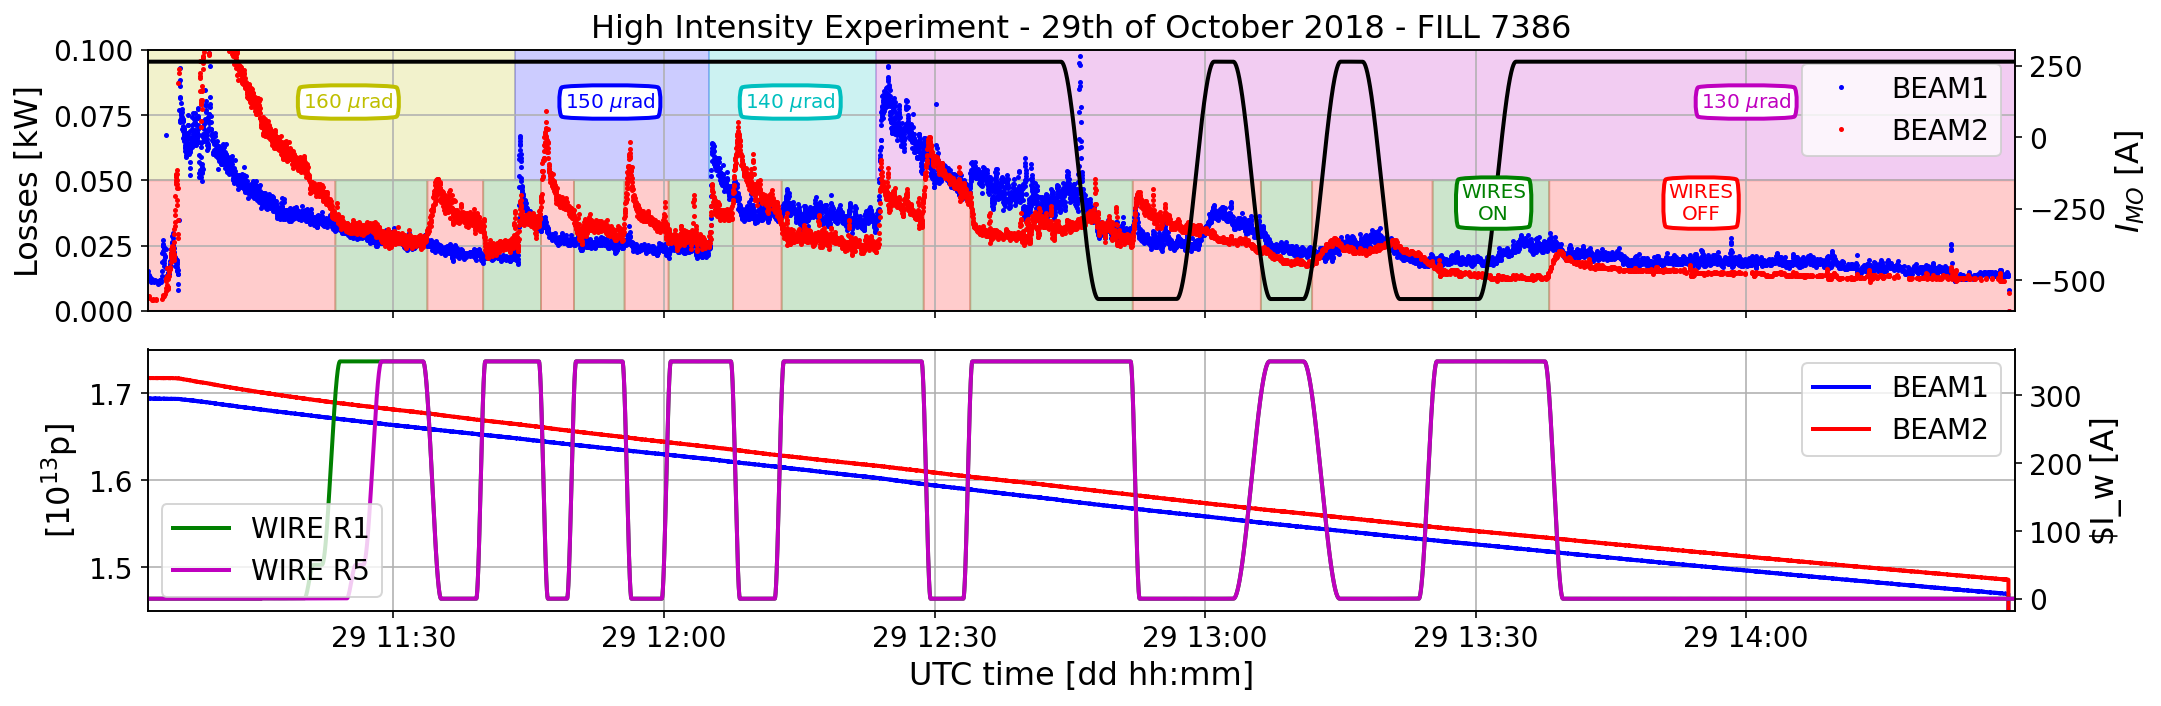

In [11]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(211)
summ_plot_df['LHC.BLM.LIFETIME:B1_LOSS_KW'].dropna().plot(color='b',alpha=1,ls='None',marker='.',label='BEAM1',ms=3, zorder=2)
summ_plot_df['LHC.BLM.LIFETIME:B2_LOSS_KW'].dropna().plot(color='r',alpha=1,ls='None',marker='.',label='BEAM2',ms=3, zorder=2)

plotFunctions.setShadedRegion(plt.gca(), color='y', xLimit=[T0,T1], yLimit=[0.05,0.1],alpha=.2)
plotFunctions.setShadedRegion(plt.gca(), color='b', xLimit=[T1,T2], yLimit=[0.05,0.1],alpha=.2)
plotFunctions.setShadedRegion(plt.gca(), color='c', xLimit=[T2,T3], yLimit=[0.05,0.1],alpha=.2)
plotFunctions.setShadedRegion(plt.gca(), color='m', xLimit=[T3,T4], yLimit=[0.05,0.1],alpha=.2)

plotFunctions.setArrowLabel(plt.gca(), label='160 $\\mu$rad', \
                            arrowPosition=(pd.Timestamp('2018-10-29 12:25',tz='CET').to_pydatetime(),0.08),\
                            labelPosition=(pd.Timestamp('2018-10-29 12:25',tz='CET').to_pydatetime(),0.08), myColor='y')

plotFunctions.setArrowLabel(plt.gca(), label='150 $\\mu$rad', \
                            arrowPosition=(pd.Timestamp('2018-10-29 12:54',tz='CET').to_pydatetime(),0.08),\
                            labelPosition=(pd.Timestamp('2018-10-29 12:54',tz='CET').to_pydatetime(),0.08), myColor='b')


plotFunctions.setArrowLabel(plt.gca(), label='140 $\\mu$rad', \
                            arrowPosition=(pd.Timestamp('2018-10-29 13:14',tz='CET').to_pydatetime(),0.08),\
                            labelPosition=(pd.Timestamp('2018-10-29 13:14',tz='CET').to_pydatetime(),0.08), myColor='c')


plotFunctions.setArrowLabel(plt.gca(), label='130 $\\mu$rad', \
                            arrowPosition=(pd.Timestamp('2018-10-29 15:00',tz='CET').to_pydatetime(),0.08),\
                            labelPosition=(pd.Timestamp('2018-10-29 15:00',tz='CET').to_pydatetime(),0.08), myColor='m')




aux = summ_plot_df['RPMC.UL16.RBBCW.R1B2:I_MEAS'].dropna()
ax1.fill_between(aux.index, 0,0.05, where=aux>300,color='g', alpha=.2)
ax1.fill_between(aux.index, 0,0.05, where=aux<300,color='r', alpha=.2)



ax1.set_ylim([0,0.1])
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelbottom=False)

plt.grid()
plt.title('High Intensity Experiment - 29th of October 2018 - FILL 7386', fontsize=16)
ax1.set_ylabel('Losses [kW]', fontsize=16)
plt.legend(loc='upper right', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(summ_plot_df['RPMBB.RR17.ROF.A12B2:I_MEAS'].dropna(),'k',lw=2,zorder=1)
ax2.set_ylabel('$I_{MO}$ [A]', fontsize=16)
ax2.tick_params(axis='y', colors='k')
ax2.yaxis.label.set_color('k')

ax2.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='x', labelbottom=False)


plotFunctions.setArrowLabel(plt.gca(), label='WIRES\nON', \
                            arrowPosition=(pd.Timestamp('2018-10-29 14:32',tz='CET').to_pydatetime(),-230),\
                            labelPosition=(pd.Timestamp('2018-10-29 14:32',tz='CET').to_pydatetime(),-230), myColor='g')

plotFunctions.setArrowLabel(plt.gca(), label='WIRES\nOFF', \
                            arrowPosition=(pd.Timestamp('2018-10-29 14:55',tz='CET').to_pydatetime(),-230),\
                            labelPosition=(pd.Timestamp('2018-10-29 14:55',tz='CET').to_pydatetime(),-230), myColor='r')



ax3 = fig.add_subplot(212,sharex=ax1)
ax3.plot((summ_plot_df['LHC.BCTDC.A6R4.B1:BEAM_INTENSITY'].dropna())/1e13,'b',lw=2,label='BEAM1')
ax3.plot((summ_plot_df['LHC.BCTDC.A6R4.B2:BEAM_INTENSITY'].dropna())/1e13,'r',lw=2,label='BEAM2')
ax3.set_ylim(1.45,1.75)
ax3.set_xlabel('UTC time [dd hh:mm]', fontsize=16)
ax3.set_ylabel('[$10^{13}$p]', fontsize=16)
ax3.legend(loc='upper right', fontsize=14)
ax3.grid()

ax3.tick_params(labelsize=14)

ax4 = ax3.twinx()
ax4.plot(summ_plot_df['RPMC.UL16.RBBCW.R1B2:I_MEAS'].dropna(),'g',lw=2,label='WIRE R1')
ax4.plot(summ_plot_df['RPMC.UL557.RBBCW.R5B2:I_MEAS'].dropna(),'m',lw=2,label='WIRE R5')
ax4.set_ylabel('$I_w [A]', fontsize=16)
ax4.legend(loc='lower left', fontsize=14)
ax4.tick_params(labelsize=14)


plt.xlim(T0,T4)
plt.tight_layout();


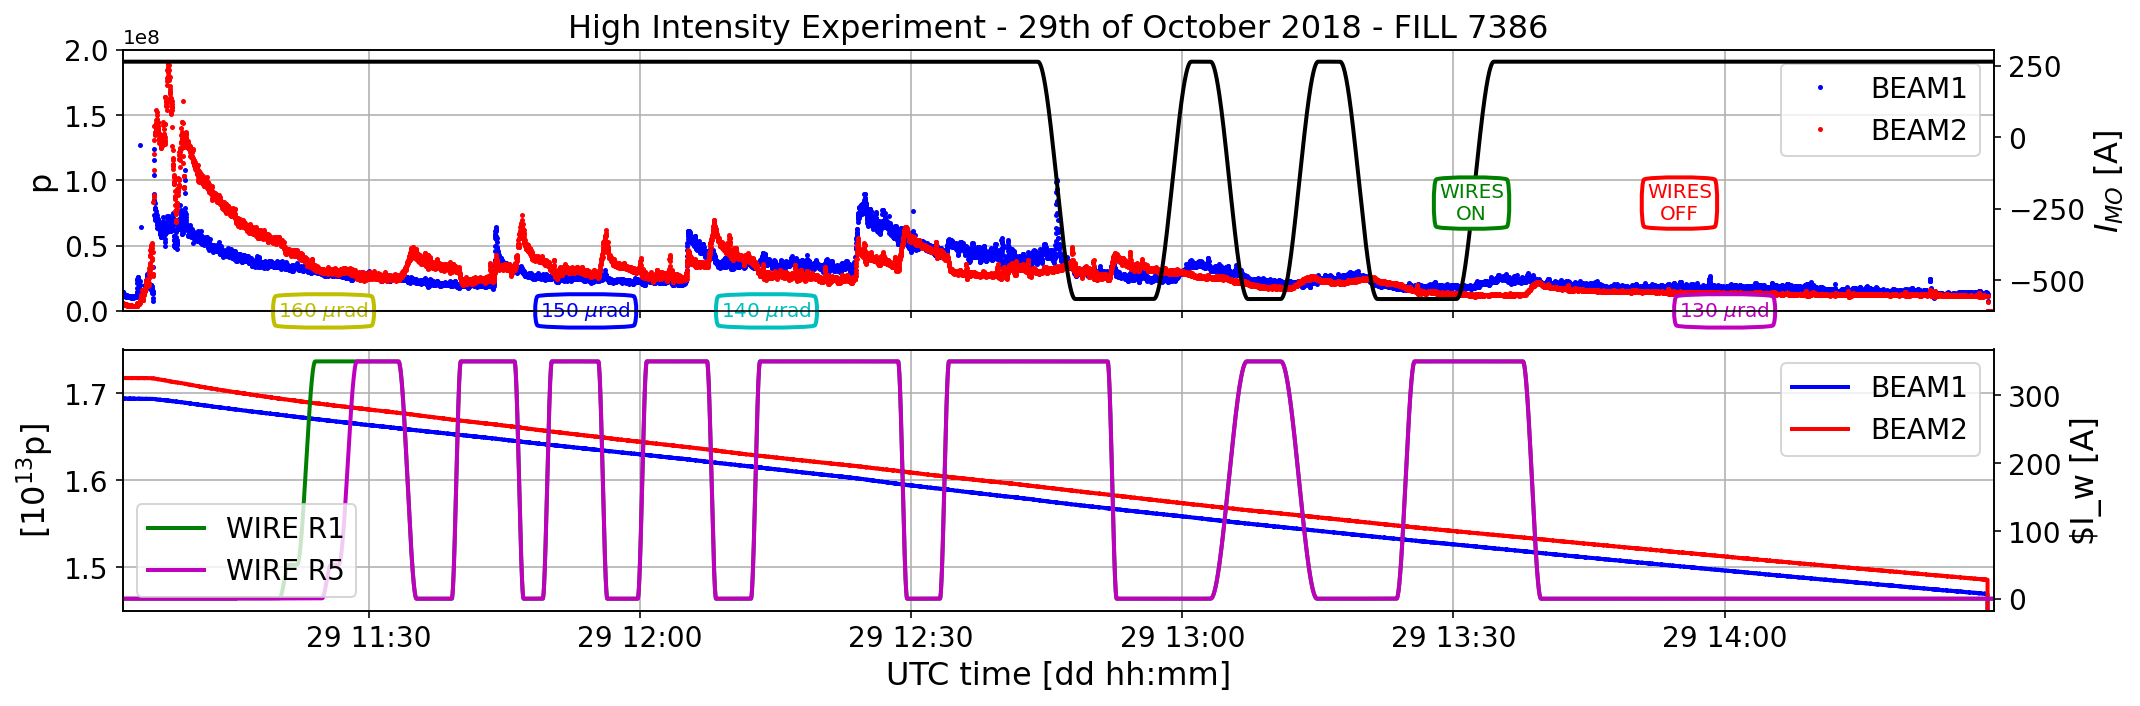

In [14]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(211)
summ_plot_df['LHC.BLM.LIFETIME:B1_CALIBRATED_LOSS'].dropna().plot(color='b',alpha=1,ls='None',marker='.',label='BEAM1',ms=3, zorder=2)
summ_plot_df['LHC.BLM.LIFETIME:B2_CALIBRATED_LOSS'].dropna().plot(color='r',alpha=1,ls='None',marker='.',label='BEAM2',ms=3, zorder=2)

plotFunctions.setShadedRegion(plt.gca(), color='y', xLimit=[T0,T1], yLimit=[0.05,0.1],alpha=.2)
plotFunctions.setShadedRegion(plt.gca(), color='b', xLimit=[T1,T2], yLimit=[0.05,0.1],alpha=.2)
plotFunctions.setShadedRegion(plt.gca(), color='c', xLimit=[T2,T3], yLimit=[0.05,0.1],alpha=.2)
plotFunctions.setShadedRegion(plt.gca(), color='m', xLimit=[T3,T4], yLimit=[0.05,0.1],alpha=.2)

plotFunctions.setArrowLabel(plt.gca(), label='160 $\\mu$rad', \
                            arrowPosition=(pd.Timestamp('2018-10-29 12:25',tz='CET').to_pydatetime(),0.08),\
                            labelPosition=(pd.Timestamp('2018-10-29 12:25',tz='CET').to_pydatetime(),0.08), myColor='y')

plotFunctions.setArrowLabel(plt.gca(), label='150 $\\mu$rad', \
                            arrowPosition=(pd.Timestamp('2018-10-29 12:54',tz='CET').to_pydatetime(),0.08),\
                            labelPosition=(pd.Timestamp('2018-10-29 12:54',tz='CET').to_pydatetime(),0.08), myColor='b')


plotFunctions.setArrowLabel(plt.gca(), label='140 $\\mu$rad', \
                            arrowPosition=(pd.Timestamp('2018-10-29 13:14',tz='CET').to_pydatetime(),0.08),\
                            labelPosition=(pd.Timestamp('2018-10-29 13:14',tz='CET').to_pydatetime(),0.08), myColor='c')


plotFunctions.setArrowLabel(plt.gca(), label='130 $\\mu$rad', \
                            arrowPosition=(pd.Timestamp('2018-10-29 15:00',tz='CET').to_pydatetime(),0.08),\
                            labelPosition=(pd.Timestamp('2018-10-29 15:00',tz='CET').to_pydatetime(),0.08), myColor='m')




aux = summ_plot_df['RPMC.UL16.RBBCW.R1B2:I_MEAS'].dropna()
ax1.fill_between(aux.index, 0,0.05, where=aux>300,color='g', alpha=.2)
ax1.fill_between(aux.index, 0,0.05, where=aux<300,color='r', alpha=.2)



ax1.set_ylim([0,2e8])
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelbottom=False)

plt.grid()
plt.title('High Intensity Experiment - 29th of October 2018 - FILL 7386', fontsize=16)
ax1.set_ylabel('p', fontsize=16)
plt.legend(loc='upper right', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(summ_plot_df['RPMBB.RR17.ROF.A12B2:I_MEAS'].dropna(),'k',lw=2,zorder=1)
ax2.set_ylabel('$I_{MO}$ [A]', fontsize=16)
ax2.tick_params(axis='y', colors='k')
ax2.yaxis.label.set_color('k')

ax2.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='x', labelbottom=False)


plotFunctions.setArrowLabel(plt.gca(), label='WIRES\nON', \
                            arrowPosition=(pd.Timestamp('2018-10-29 14:32',tz='CET').to_pydatetime(),-230),\
                            labelPosition=(pd.Timestamp('2018-10-29 14:32',tz='CET').to_pydatetime(),-230), myColor='g')

plotFunctions.setArrowLabel(plt.gca(), label='WIRES\nOFF', \
                            arrowPosition=(pd.Timestamp('2018-10-29 14:55',tz='CET').to_pydatetime(),-230),\
                            labelPosition=(pd.Timestamp('2018-10-29 14:55',tz='CET').to_pydatetime(),-230), myColor='r')



ax3 = fig.add_subplot(212,sharex=ax1)
ax3.plot((summ_plot_df['LHC.BCTDC.A6R4.B1:BEAM_INTENSITY'].dropna())/1e13,'b',lw=2,label='BEAM1')
ax3.plot((summ_plot_df['LHC.BCTDC.A6R4.B2:BEAM_INTENSITY'].dropna())/1e13,'r',lw=2,label='BEAM2')
ax3.set_ylim(1.45,1.75)
ax3.set_xlabel('UTC time [dd hh:mm]', fontsize=16)
ax3.set_ylabel('[$10^{13}$p]', fontsize=16)
ax3.legend(loc='upper right', fontsize=14)
ax3.grid()

ax3.tick_params(labelsize=14)

ax4 = ax3.twinx()
ax4.plot(summ_plot_df['RPMC.UL16.RBBCW.R1B2:I_MEAS'].dropna(),'g',lw=2,label='WIRE R1')
ax4.plot(summ_plot_df['RPMC.UL557.RBBCW.R5B2:I_MEAS'].dropna(),'m',lw=2,label='WIRE R5')
ax4.set_ylabel('$I_w [A]', fontsize=16)
ax4.legend(loc='lower left', fontsize=14)
ax4.tick_params(labelsize=14)


plt.xlim(T0,T4)
plt.tight_layout();


## dBLM

You can find a lot of useful scripts there : https://github.com/sterbini/cl2pd/blob/master/cl2pd/importData.py

Unfortunately, this package was based on CALS, which has been deprecated. So you cannot use the package itself, but it can be used as inspiration. Here, I'm taking the function used to read dBLM data.

In [42]:
def dBLM2pd(fileName, bunchList,rollInterval,t1=None,t2=None):
    '''
    It returns a pd dataframe with the list of bunches. 
    
    The fileName is the hdf5 file to read.
        The dBLM folder is at
        /eos/project/dblm/TZ76
        so for instance you can find at 
        /eos/project/dblm/TZ76/TCP_18_B2/hist_BOX2_0724-195110_f6972_ADJUST.hdf5
        some the adjust of FILL 6972.
        
    The bunchList is the list of the bunches to consider in the pd dataframe.
    
    The rollInterval is delaying correctly the signal for proper gating
        +++ IMPORTANT +++
        Use rollInterval=20631 for Beam 1 and TZ76.
        Use rollInterval=13332 for Beam 2 and TZ76.
        For checking the delay have a look to the exa ple below.
    
    t1 and t2 are the timestamps to consider to windowing the analysis. 
    
    
    Thanks to A. Gorzawski and A. Poyet for providing the insight and the original code.
    === EXAMPLE ===
    myFile='/eos/project/dblm/TZ76/TCP_18_B2/hist_BOX2_0724-195110_f6972_ADJUST.hdf5'
    bunchList = np.array([10,390])
    t1 = pd.Timestamp('2018-07-24 19:51:10.443826',tz='UTC')
    t2 = pd.Timestamp('2018-07-25 20:51:10.443826',tz='CET')
    aux=importData.dBLM2pd(myFile,bunchList,rollInterval=13332,t1=t1,t2=t2)
    plt.plot(aux.resample('20s').mean())
    plt.ylim(0,30)
    
    # checks the delay of B1
    # in this fill we have two bunches in B1 in slot 10 and 50, 100 [start of the 12b],
    # 200 [start of the 48b], 283 [start of the 48b] and 366 [start of the 48b] >> the first bunch slot available is 0 and not 1!
    myFile='/eos/project/dblm/TZ76/TCP_18_B1/hist_BOX1_0724-195120_f6972_ADJUST.hdf5'
    a = h5py.File(myFile,'r')
    b = a['data']
    index=b.keys()[0]
    y=np.roll(b[index],20631,axis=0)
    x=np.linspace(0,3564,len(b[index]))
    a=plt.plot(x,y)
    plt.xlim(365,366+49)# bunch 10 shuld ne between position 10 and 11.
    
    # checks the delay of B2
    # in this fill we have two bunches in B2 in slot 10 and 390 >> the first bunch slot available is 0 and not 1!
    myFile='/eos/project/dblm/TZ76/TCP_18_B2/hist_BOX2_0724-195110_f6972_ADJUST.hdf5'
    a = h5py.File(myFile,'r')
    b = a['data']
    index=b.keys()[0]
    y=np.roll(b[index],13332,axis=0)
    x=np.linspace(0,3564,len(b[index]))
    a=plt.plot(x,y)
    plt.xlim(10,11)# bunch 10 shuld ne between position 10 and 11.
    '''

    '''
    === ORIGINAL CODE FROM AXEL ===
    # I preferred to use pandas systematically
    final_DF = pd.DataFrame()
    a = h5py.File(File,'r')
    b = a['data']
    keys  = b.keys()
    interestingKeys = []
    myInterestingKeys = []
    for i in range(len(keys)):
        if (datetime.datetime.strptime(keys[i],'%Y-%m-%d %H:%M:%S.%f')>t1) & (datetime.datetime.strptime(keys[i],'%Y-%m-%d %H:%M:%S.%f')<t2):
            interestingKeys.append(keys[i])
            myInterestingKeys.append(datetime.datetime.strptime(keys[i],'%Y-%m-%d %H:%M:%S.%f'))
    aux = []
    for i in interestingKeys:
        aux.append(np.roll(b[i].value,13322,axis=0))
    myDF = pd.DataFrame(np.stack(aux),index = myInterestingKeys)
    bunchCenters = np.zeros(len(fill))
    for i in range(len(fill)):
        bunchCenters[i] = int(fill[i]/3564.*55578)
        final_DF['bunch_'+str(fill[i])] = myDF.ix[:,(bunchCenters[i]-nbBins/2):(bunchCenters[i]+nbBins/2)].sum(axis=1).diff().resample(str(secondOfResampling)+'s').sum()/secondOfResampling
    return final_DF
    '''
    a = h5py.File(fileName,'r')
    b = a['data']
    
    myDF=pd.DataFrame()
    
    aux=pd.DataFrame(list(b.keys()),index=list(map(pd.Timestamp,list(b.keys()))),columns=['KEY'] )
    aux.index=aux.index.tz_localize('CET').tz_convert('UTC')
    if t1==None: t1=aux.index[0]
    if t2==None: t2=aux.index[-1]
    aux=aux[t1:t2].copy()
    # the rollInterval depends on the electric delay of the acquisition device wrt the bunch 0
    aux['VALUE']=aux['KEY'].apply(lambda x:np.roll(b[x],rollInterval,axis=0)) 
    for i in bunchList:
        # Integrating between 5 and 95% of the bunch slot and differentiating
        myDF['bunch_'+str(i)]=aux['VALUE'].apply(lambda x:np.sum(x[int((i+0.05)/3564.*55578):int((i+0.95)/3564.*55578)])).diff()
    return myDF

In [26]:
# File
dblm_data_file = data_path+'DBLM_DATA.hdf5'

dblm_data_df = dBLM2pd(fileName=dblm_data_file, bunchList=np.arange(200,600), rollInterval=13332)

In [28]:
dblm_data_df.head()

,bunch_200,bunch_201,bunch_202,bunch_203,bunch_204,bunch_205,bunch_206,bunch_207,bunch_208,bunch_209,...,bunch_590,bunch_591,bunch_592,bunch_593,bunch_594,bunch_595,bunch_596,bunch_597,bunch_598,bunch_599
2018-10-29 11:02:55.314133+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-29 11:02:56.448874+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-10-29 11:02:57.544246+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-10-29 11:02:58.619860+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-10-29 11:02:59.734908+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
train1 = range(300,348)
train2 = range(383,431)
train3 = range(466,514)

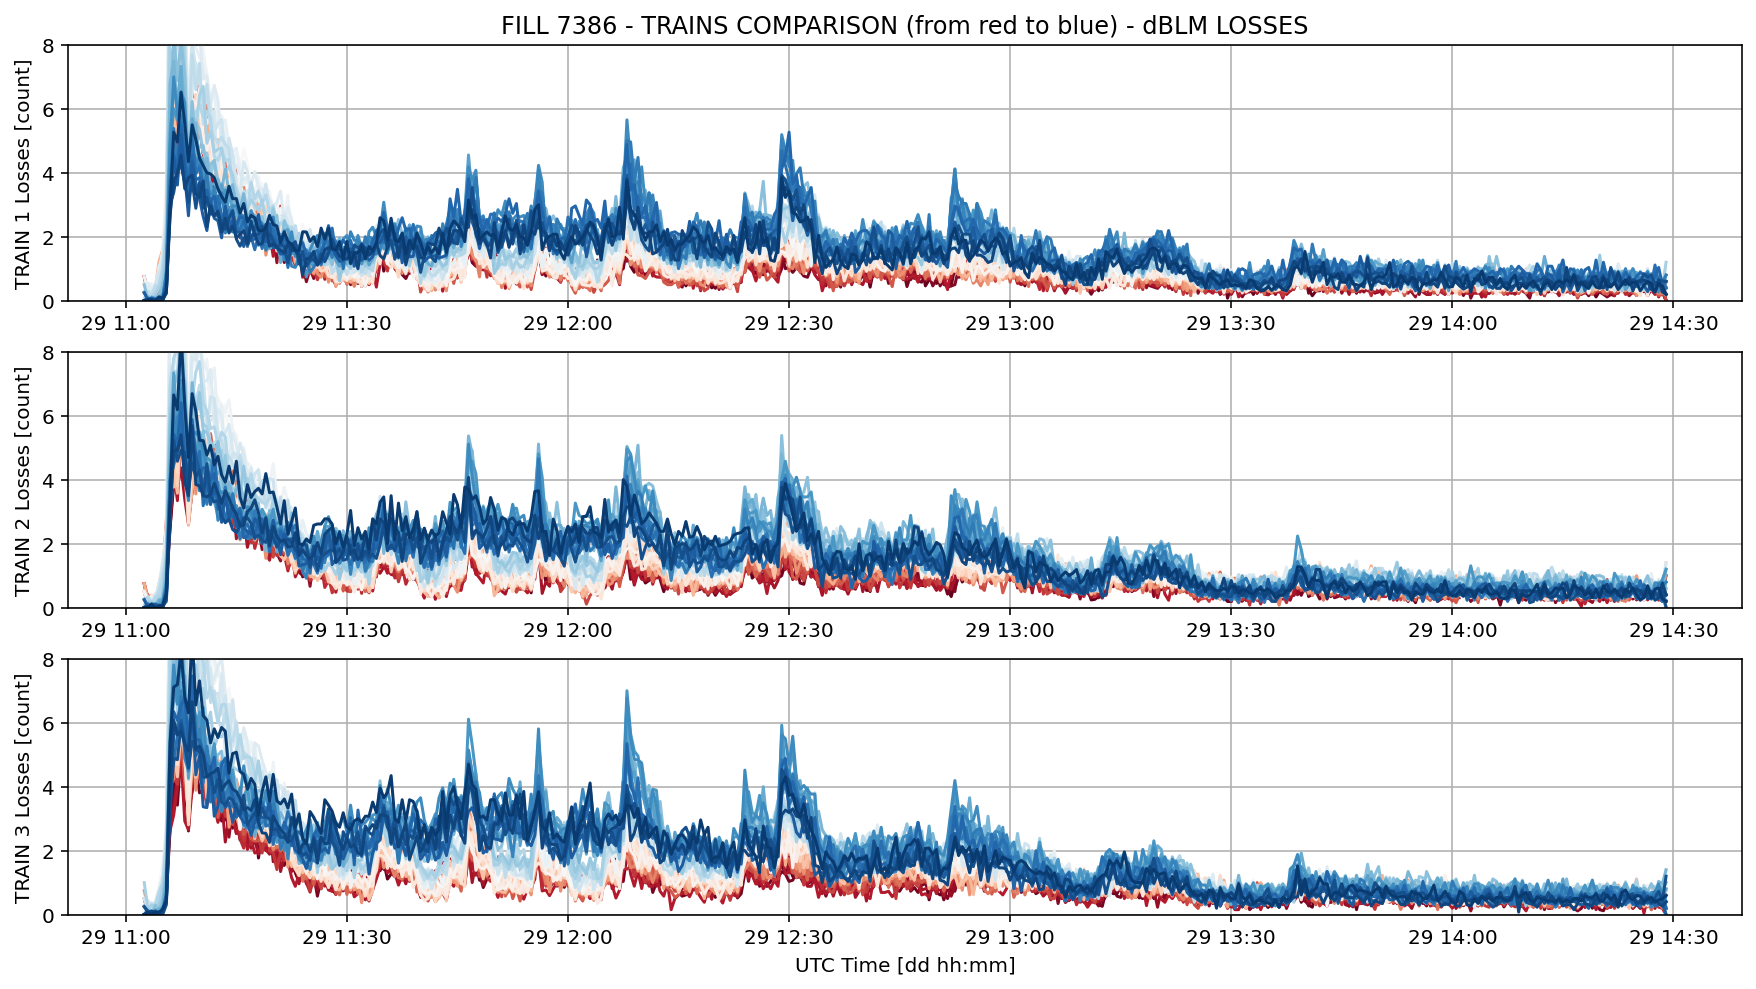

In [31]:
plt.figure(figsize=(15,8))
aux = dblm_data_df.resample('30s').mean()
train1 = range(300,348)
train2 = range(383,431)
train3 = range(466,514)
x = aux.index.to_pydatetime()

ax1 = plt.subplot(311)
for i in train1:
    y = aux['bunch_'+str(i)].values
    ax1.plot(x,y,c=cm.RdBu((1.*i-train1[0])/len(train1)))
ax1.set_ylim(0,8)
ax1.set_ylabel('TRAIN 1 Losses [count]')

ax1.xaxis.grid()
ax1.yaxis.grid()

plt.title('FILL 7386 - TRAINS COMPARISON (from red to blue) - dBLM LOSSES');

ax2 = plt.subplot(312, sharex=ax1)
for i in train2:
    y = aux['bunch_'+str(i)].values
    ax2.plot(x,y,c=cm.RdBu((1.*i-train2[0])/len(train2)))
ax2.set_ylim(0,8)
ax2.set_ylabel('TRAIN 2 Losses [count]')

ax2.xaxis.grid()
ax2.yaxis.grid()

ax3 = plt.subplot(313, sharex=ax1)
for i in train3:
    y = aux['bunch_'+str(i)].values
    plt.plot(x,y,c=cm.RdBu((1.*i-train3[0])/len(train3)))
ax3.set_ylim(0,8)
ax3.set_ylabel('TRAIN 3 Losses [count]')
ax3.set_xlabel('UTC Time [dd hh:mm]');

ax3.xaxis.grid()
ax3.yaxis.grid()


In [43]:
!pwd

/eos/home-a/apoyet/public/DATA_FOR_DIFF_STUDIES
